<a href="https://colab.research.google.com/github/shinhs0920/Engineering-computing-application/blob/master/DL-06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SingleLayer클래스 코드

신경망 모델 훈련을 위한 데이터 코드

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [0]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)

In [38]:
print(x_train.shape, x_val.shape)

(364, 30) (91, 30)


In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [0]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None              # 가중치
        self.b = None              # 절편
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.w_history = []        # 가중치 기록
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z = np.dot(x, self.w) + self.b        # 선형 출력을 계산합니다.
        return z

    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m         # 가중치에 대한 그래디언트를 계산합니다.
        b_grad = np.sum(err) / m              # 절편에 대한 그래디언트를 계산합니다.
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)                  # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                            # 샘플 개수를 저장합니다.
        self.w = np.ones((x.shape[1], 1))     # 가중치를 초기화합니다.
        self.b = 0                            # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            z = self.forpass(x)               # 정방향 계산을 수행합니다.
            a = self.activation(z)            # 활성화 함수를 적용합니다.
            err = -(y - a)                    # 오차를 계산합니다.
            # 오차를 역전파하여 그래디언트를 계산합니다.
            w_grad, b_grad = self.backprop(x, err)
            # 그래디언트에서 페널티 항의 미분 값을 더합니다.
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
            # 가중치와 절편을 업데이트합니다.
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
            # 가중치를 기록합니다.
            self.w_history.append(self.w.copy())
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = self.forpass(x)      # 정방향 계산을 수행합니다.
        return z > 0             # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def reg_loss(self):
        # 가중치에 규제를 적용합니다.
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.activation(z)             # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [0]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [0]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [46]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train, 
                 x_val=x_val_scaled, y_val=y_val, epochs=10000)
single_layer.score(x_val_scaled, y_val)

0.978021978021978

## **06-2. 2개의 층을 가진 신경망을 구현합니다** ##
 * * * 

지금까지는 SigleLayer에서 하나의 뉴런을 사용한 신경망 알고리즘으로 문제를 해결하였습니다.
<br> 이 절에서부터는 다음의 3가지를 실시하겠습니다.
* 하나의 층을 추가하고, 뉴런의 개수 증가
* 행렬연산으로 어떻게 여러 개의 뉴런을 표현
* 신경망의 구조의 변화 

### 하나의 층에 여러 개의 뉴런을 사용합니다 ###

하나의 층에 여러 개의 뉴런을 사용하였을 때 신경망의 변화
<br>-> **3개의 특성**과 **2개의 뉴런**의 경우

![1](https://user-images.githubusercontent.com/53015968/69073508-f1595580-0a70-11ea-95ed-d3976102f0c4.jpg)

 입력층에서 전달되는 특성이 각 뉴런에 모두 전달됩니다.
<br>  위 그림에서 3개의 특성은 각각 2개의 뉴런에 모두 전달되어서 **z1,z2를 출력**합니다. 
 <br> **z1을 계산**하기 위해서 x1,x2,x3와 곱해지는 **3개의 가중치(w<sub>11</sub>,w<sub>21</sub>,w<sub>31</sub>)가 필요**하고, **z2를 계산**하기 위해서도 역시 **3개의 가중치(w<sub>12</sub>,w<sub>22</sub>,w<sub>32</sub>)**가 필요합니다.
<br>또한 **각 뉴런마다** **절편(b)가 하나씩($b_1$,$b_2$)** 필요합니다. 

z1과 z2를 구하는 설명을 식으로 표현하면 다음과 같습니다.

**x**<sub>1</sub>**w**<sub>11</sub>+**x**<sub>2</sub>**w**<sub>21</sub>+**x**<sub>3</sub>**w**<sub>31</sub>+**b**<sub>1</sub>=**Z**<sub>1</sub>
<br>**x**<sub>1</sub>**w**<sub>12</sub>+**x**<sub>2</sub>**w**<sub>22</sub>+**x**<sub>3</sub>**w**<sub>32</sub>+**b**<sub>2</sub>=**Z**<sub>2</sub>

이 선형 방정식을 **행렬 곱셈**으로 바꾸면 다음과 같습니다.
<br> 행렬 계산 결과 (1,3)x(3,2)=(1,2) 행렬이 됩니다.

![2](https://user-images.githubusercontent.com/53015968/69073511-f1f1ec00-0a70-11ea-9970-d2694bca848c.jpg)

출력은 (1,2) 크기의 행렬입니다. **여러 개의 뉴런을 사용**함으로써 **가중치가** 1개의 열을 가진 벡터가 아니라 **2차원 행렬**이 되었습니다.

위 예시에서 가중치 행렬의 크기는(3,2)이며, 가중치 오른쪽 하단의 숫자의 의미는 다음 표의 설명과 같습니다.

![3](https://user-images.githubusercontent.com/53015968/69073512-f1f1ec00-0a70-11ea-9ffd-f4113620ddd1.jpg)


**가중치 행렬**은 **(입력의 개수, 출력의 개수)**를 뜻합니다. 지금은 2개의 뉴런을 사용하므로 출력의 개수는 2개입니다. **만약, 하나의 뉴런을 사용**한다면 출력의 개수는 1개이므로 가중치는 앞의 **단일 뉴런 예시처럼** (3,1)크기의 **열 벡터**가 되는 것입니다.

지금까지 설명한 것은 샘플 1개에 대한 설명입니다. 만약 **샘플 전체에 대한 수식**은 다음과 같습니다.

**$XW_1+b_1=Z_1$**

이때 **W**<sub>1</sub>은 **첫번째 층(입력층)의 가중치 행렬**이란 의미로 첨자 1을 사용했습니다.
<br>**절편**은 가중치와 구분하여 **1차원 배열**이라는 뜻을 강조하기 위해 소문자 **b**<sub>1</sub>을 사용했습니다.


### 출력을 하나로 모읍니다

앞의 예제였던 위스콘신 유방암 데이터 세트로 우리가 해결해야 할 문제는 **악성종양인지 정상종양인지 구분**하는 것입니다.

즉, **이진분류 문제**이므로 각 뉴런에서의 **출력값** (z<sub>1</sub>,z<sub>2</sub>,등등)을 **하나의 뉴런으로 다시 모아**서 
하나의 값을 추출하여 <br> 그 **단일 값**으로 **이진분류**를 해야합니다.

유방암 데이터 **1개의 샘플**에 있는 **여러 특성(30개)의 값**을 각 뉴런에 통과시키면 여러 개의 출력값(a<sub>1</sub>,a<sub>2</sub>,등등)가 나오는데 이 여러 값중 **특정 하나를 골라**서 **이진 분류에 사용할 수는 없기 때문에** 여러 출력값들을 **다시 하나로 모아서** 이진분류를 수행할 **기준값(z)**를 만드는 것입니다. 

위 설명을 다음 그림으로 표현해 보겠습니다.

![4](https://user-images.githubusercontent.com/53015968/69073513-f1f1ec00-0a70-11ea-96d2-7910a93a3748.jpg)

**z<sub>1</sub>,z<sub>2</sub>**는 **마지막 뉴런으로 모으기 전 출력 값**이고, **a<sub>1</sub>,a<sub>2</sub>**는 **활성화 함수에 통과시킨 값**입니다. <br>편의상 a값을 **활성화 출력**이라 부르겠습니다.

**2개의 활성화 출력**이 **마지막 뉴런에 입력**되고 여기에 **절편(b)가 더해져**서 이진분류를 위한 **최종 값(z)**가 만들어집니다. <br>앞선 단일층 신경망 그림과 비슷합니다.

이 과정을 **선형 방정식**과 **행렬 곱셈**을 표현해보겠습니다.

$a_1$$w_1$ + $a_2$$w_2$ + $b_2$ = $z$ (선형 방정식)
<br> [$a_1$$a_2$] 
$\left[\begin{array}{rr} 
w_1\\
w_2
\end{array}\right]$ + $b_2$ = $z$ (행렬 곱셈)

역시 위는 샘플 1개에 대한 식이므로, 샘플 전체에 대한 행렬 곱셈 표현은 다음과 같습니다.

**$A_1W_2+b_2=Z_2$**

위 상황은 **두번째 층** (출력을 하나로 모아주는 층)이므로 **W**에 **하첨자 2**를 썼습니다. <BR>행렬 **A**<sub>1</sub>의 크기는 **(전체 샘플 수,2)** 이므로 (m,2)이고 **W**<sub>2</sub>의 크기는 **(입력의 크기, 출력의 크기)**이므로 (2,1)입니다.

### 은닉층이 추가된 신경망을 알아봅니다 ###

이제 앞에선 살펴본 것들을 하나로 연결한 **전체구조**는 다음과 같습니다.

![5](https://user-images.githubusercontent.com/53015968/69073514-f28a8280-0a70-11ea-87f5-f3c87a5722e3.jpg)


(여기서는 은닉층에 절편을 표시하지 않았습니다.)

**2개의 뉴런층**과 **2개의 층**(은닉층, 출력층)을 가진 신경망이 만들어졌습니다. 입력값이 모여 있는 층은 입력층이라 부르는데, <BR>보통 **입력층은 층의 개수에 포함시키지 않습니다**.

**입력층의 값**들은 **출력층으로 전달되기 전**에 2개의 뉴런으로 구성된 **은닉층을 통과**합니다. 그 다음, **은닉층을 통과한 값**들이 출력층에서 **하나로 합쳐집니다**.

### 입력과 출력은 행렬로 표기합니다 ###

위 그림의 값들을 행렬로 표시하면 훨씬 간단해집니다. 다음과 같이 말입니다.



![6](https://user-images.githubusercontent.com/53015968/69073515-f28a8280-0a70-11ea-97c5-8db854c35e3d.jpg)

2개의 층을 가진 이 신경망은 **입력 행렬** $X$, **첫번째 층**의 **가중치 행렬** $W_1$과 **절편** $b_1$ (절편은 열벡터입니다.),<br>**첫번재 층의 출력** $Z_1$, **첫 번째 층의 활성화 출력** $A_1$,

**두 번째 층의 가중치 행렬** $W_2$ 과 **절편** $b_2$, **두 번째 층의 출력** $Z_2$ 로 나타냅니다.

물론 **이진 분류 최종 예측을 위해** 두번째 층의 출력($Z_2$)도 **시그모이드 함수**에 **다시 통과**시켜서 **확률값**을 얻어야 하지만 이번 장에서는 지금 이 구조로만 설명하겠습니다.

쉽게 이해하기 위해 신경망에서 하나의 **층**을 **행렬**로, 하나의 **뉴런**을 행렬의 **열**로 생각하면 됩니다.

![2](https://user-images.githubusercontent.com/53015968/69073511-f1f1ec00-0a70-11ea-9970-d2694bca848c.jpg)

위 **행렬 전체**는 **하나의 층**을 뜻하고, **행렬의 열**이 **2개**이므로 **뉴런**이 **2개**입니다.

### 다층 신경망의 개념을 정리합니다 ###

일반적인 다층 신경망의 **각 층은 2개 이상의 뉴런을 사용**합니다. 따라서 앞에서 본 신경망에서 **각 층의 뉴런 개수**를 2개가 아닌 **m**개로 늘리겠습니다. 이때 **활성화함수**를 **뉴런 오른쪽에 작은 원으로 붙여서 표현**합니다. 

![7](https://user-images.githubusercontent.com/53015968/69073516-f28a8280-0a70-11ea-93f0-bbc06cdd7b61.jpg)


**n개의 입력**이 **m개의 뉴런**으로 입력됩니다. 그리고 **은닉층을 통과한 값**들은 다시 **출력층**으로 모입니다. 이것을 **딥러닝** 이라고 합니다.

#### 다층 신경망에서의 주의사항 및 알아야할 개념####

**주의사항**: **활성화 함수**는 층마다 다를 수 있지만 **한 층에서는 같아야 합니다.**

-> 은닉층과 출력층에 있는 모든 뉴런은 상황에 따라 알맞은 활성화함수를 사용해하며, 같은 층에 있는 뉴런은 모두 같은 활성화 함수를 사용해야합니다. 

-> 예를 들면 앞선 **유방암 데이터 이진 분류 문제**에서는 **출력층의 모든 뉴런**은 **활성화 함수**로 **시그모이드 함수**를 사용해야합니다.<br>(이진분류를 위한 확률형 데이터로의 변환을 위해)

**완전 연결 신경망** : 모든 뉴런이 연결되어 있는 신경망

-> 위 그림은 입력층, 은닉층, 출력층 사이에 모든 뉴런이 연결되어 있으므로 **완전 연결 신경망** 또는 **다층 퍼셉트론** 이라고도 부릅니다.

또는 층과 층사이 데이터 흐름이 한쪽 방향으로만 진행되어서 **피드 포워드(feed forward) 신경망**이라고도 합니다.

### 다층 신경망에 경사 하강법을 적용합니다

이번에는 **층이 2개**인 **다층 신경망**에 **데이터**와 **가중치**, **손실함수**를 표시하고 **구조를 설명**한 후 **경사 하강법이 어떻게** 다층 신경망에 **적용**되는지 알아보겠습니다.

경사 하강법은 예측값이 실제값과 맞도록 그레디언트를 이용하여 W와 b값을 조절하는 방법 입니다. <br>따라서 $W_1$, $b_1$, $W_2$, $b_2$를 경사 하강법을 이용하여 업데이트 할 것입니다.

![8](https://user-images.githubusercontent.com/53015968/69073518-f3231900-0a70-11ea-84cf-7f3b6fca2ed6.jpg)


<br>**입력데이터** $X$ 와 **가중치** $W_1$을 곱하고 **절편** $b_1$을 더해 $Z_1$이 됩니다.$Z_1$은 **활성화 함수(시그모이드 함수)**를 통과하여 $A_1$이 됩니다.

첫번째 **은닉층**의 **활성화 출력** $A_1$과 **출력층**의 **가중치** $W_2$를 곱하고 **절편** $b_2$를 더해서 $Z_2$ 를 만듭니다. <BR>그리고 $Z_2$는 **활성화 함수(시그모이드 함수)**를 통과하여 $A_2$가 됩니다.

여기서 $A_2$ 값을 보고 **0.5보다 크면 양성**, 그렇지 않으면 **음성**으로 예측합니다($\hat{Y}$).

이제 이 다층 신경망에 **경사 하강법**을 사용하려면 $W_2$와 $b_2$ 그리고 $W_1$,$b_1$에 대한 **손실 함수** $L$의 **도함수**를 구해야 합니다

각 층의 **가중치**, **절편**에 대해 **손실 함수를 미분**해보겠습니다. 미분 순서는 출력층에서 은닉층 방향(**역방향**)이며 손실함수 **L**은 **로지스틱 손실 함수**입니다. 

+ 로지스틱 손실함수 : 크로스 엔트로피(cross entropy)손실 함수를 이진 분류 방법으로 만든 것

### 가중치에 대해 손실함수 미분(출력층) -> $ \frac {\partial{L}} {\partial{W_2}}$ ###

$W_2$에 대한 손실 함수의 미분을 연쇄 법칙으로 쓰면 다음과 같습니다.

$$ \frac {\partial{L}} {\partial{W_2}} =  \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{W_2}} $$

위 식을 신경망에 적용하면 다음과 같습니다.

![9](https://user-images.githubusercontent.com/53015968/69073505-f0c0bf00-0a70-11ea-8ce7-b062f5dbcd6b.jpg)

위 그림은 4장에서 본 손실 함수의 미분을 행렬로 확장한 그림입니다. 즉, 다음 식을 행렬로 표현하면,

**$ \frac {\partial{L}} {\partial{w_i}} =  \frac {\partial{L}} {\partial{z}}  \frac {\partial{z}} {\partial{w_i}}= -(y-a)x_i$** 이고, 위 식에서 $-(y-a)$를 $(Y-A_2)$로 바꾸면,

![10](https://user-images.githubusercontent.com/53015968/69073506-f1595580-0a70-11ea-9251-4b3a4c2ee4f0.jpg)

$x_i$는 이전 층의 출력인 $A_1$으로 생각하면 됩니다.

![a](https://user-images.githubusercontent.com/53015968/69073543-f9b19080-0a70-11ea-8603-17dffbed6dd2.jpg)

이제 행렬로 표현된 도함수를 곱합니다.

### 도함수를 곱합니다(출력층) -> $ \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{W_2}} $

$-(Y-A_2)$는 $A_1$와 그냥 곱하면 안 됩니다. 행렬의 크기와 순서에 주의해야 합니다. <br>$-(Y-A_2)$의 행렬 크기는 $Y$가 (m,1)이고,$A_2$도 (m,1) 크기이므로 (m,1)입니다. 

$A_1$은 다음과 같습니다.

![b](https://user-images.githubusercontent.com/53015968/69073544-f9b19080-0a70-11ea-9878-8309dc961635.jpg)

$A_1$의 **첫 번째 열**은 **첫 번째 뉴런의 활성화 출력**입니다. 이 열을 **각 샘플이 만든 오차**와 **곱한 다음 모두 더하면** **첫 번째 뉴런에 대한 그레디언트의 총 합**이 됩니다.<br> 마찬가지로  $A_1$의 두 번째 열은 모든 샘플에 대한 두 번째 뉴런의 활성화 출력이므로 샘플의 오차와 곱하면 두 번째 뉴런에 대한 그레디언트의 총 합이 됩니다.

$A_1$의 크기는 (m,2)이고 $-(Y-A_2)$의 크기는 (m,1)이므로 $A_1$을 **전치**($A_1^T$)하여$-(Y-A_2)$와 곱해야 합니다.<br>그 결과 $W_2$와 같은 (2,1) 크기의 그레디언트 행렬을 얻습니다.

$$ \frac {\partial{L}} {\partial{W_2}}= \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{W_2}} = A_1^T(-(Y-A_2))$$

![c](https://user-images.githubusercontent.com/53015968/69079425-4b601800-0a7d-11ea-8882-feef20581857.jpg)


위에서 구한 그레디언트 행렬은 **모든 샘플에 대한 그레디언트 총 합**이므로 **가중치 행렬을 업데이트** 하기위해 **평균 그레디언트 행렬**을 구합니다.<br>그리고 적절한 **학습률(lr)을 곱하여** 가중치 행렬 $W_2$을 업데이트 하면 됩니다.

즉, 위에서 구한 (그레디언트 총합)X(학습률)= 업데이트 된 가중치 행렬$W_2$

### 절편에 대하여 손실 함수를 미분합니다(출력층) ->  $ \frac {\partial{L}} {\partial{b_2}}$ 

신경망에 **절편**에 대한 **손실함수 미분**까지 표시하면 다음과 같습니다.

![d](https://user-images.githubusercontent.com/53015968/69073527-f7e7cd00-0a70-11ea-9eed-1d9bb9cb7a14.jpg)

위의 그림에서 $ \frac {\partial{Z_2}} {\partial{b_2}}=1$ 만 추가 되었습니다.

$Z_2$를 절편에 대해 미분하면 **1**입니다. **1**로 표시한 이유는 **모든 원소가 1인 벡터 행렬**을 나타내기 위함입니다. 절편$b_2$에 대한 손실함수의 도함수는 연쇄법칙으로 다음과 같이 나타냅니다

![e](https://user-images.githubusercontent.com/53015968/69073529-f7e7cd00-0a70-11ea-927f-831d6b44277e.jpg)

앞선 설명처럼 행렬 계산을 위해 모든 원소가 1인 벡터 행렬을 **전치**하여 계산합니다. <br>0.18을 전체 샘플 개수로 나눠서 평균 그레디언트를 구하면 됩니다.

### 가중치에 대하여 손실함수를 미분합니다(은닉층) -> $ \frac {\partial{L}} {\partial{W_1}}$ 

$W_1$에 대한 손실함수 미분 역시 연쇄법칙으로 나타냅니다

$$ \frac {\partial{L}} {\partial{W_1}} =  \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{A_1}}\frac {\partial{A_1}} {\partial{Z_1}}  \frac {\partial{Z_1}} {\partial{W_1}} $$

좀 복잡하므로 그림으로 다시 나타내면 다음과 같습니다

![f](https://user-images.githubusercontent.com/53015968/69073531-f7e7cd00-0a70-11ea-9159-31a1080c5d5e.jpg)

연쇄법칙의 $\frac {\partial{Z_1}} {\partial{W_1}} $ 부터 살펴보겠습니다.

$ {Z_1}=XW_1+b_1 $ 이므로 $ \frac {\partial{Z_1}} {\partial{W_1}}=X $입니다.

예를 들어 입력의 특성이 3개인 경우 (m,3) 크기의 행렬을 생각하면 됩니다.

![g](https://user-images.githubusercontent.com/53015968/69073532-f8806380-0a70-11ea-8c0f-52e5cd3ff311.jpg)

그 다음은 $ \frac {\partial{A_1}} {\partial{Z_1}} $ 입니다.

04-3에서 시그모이드 함수의 도함수가 $a(1-a)$임을 배웠으므로 $ \frac {\partial{A_1}} {\partial{Z_1}} $의 도함수는 $A_1◉(1-A_1)$가 됩니다. <br>원소별 곱셈은 ◉기호를 사용합니다. $A_1◉(1-A_1)$크기는 (m,2)가 됩니다.

![h](https://user-images.githubusercontent.com/53015968/69073534-f8806380-0a70-11ea-95cc-885c56723718.jpg)


 $ \frac {\partial{Z_2}} {\partial{A_1}} $는  $Z_2= A_1 W_2+ b_2$이므로  $A_1$에 대해 미분하면 출력층의 가충치  $W_2$만 남습니다. 
 <br>이 행렬의 크기는 은닉층의 뉴런 개수와 같으므로 (2,1)입니다.

$$ \frac {\partial{Z_2}} {\partial{A_1}} =  W_2 = \left[\begin{array}{rr} 
0.02\\
0.16
\end{array}\right]$$

마지막으로 $ \frac {\partial{L}} {\partial{Z_2}} $ 입니다. $ \frac {\partial{L}} {\partial{Z_2}} $ 는 앞에서 구한것과 동일합니다.

![i](https://user-images.githubusercontent.com/53015968/69073536-f8806380-0a70-11ea-9328-ccaf40bd951d.jpg)

###도함수를 곱합니다(은닉층) -> $ \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{A_1}} \frac {\partial{A_1}} {\partial{Z_1}}  \frac {\partial{Z_1}} {\partial{W_1}} $

이 도함수들을 곱해 보겠습니다. 도함수를 곱하는 순서는 신경망의 역방향 순서로 진행합니다. 먼저 $ \frac {\partial{L}} {\partial{Z_2}} $ 과 $ \frac {\partial{Z_2}} {\partial{A_1}} $ 를 곱합니다. 각 도함수는 $-(Y-A_2)$와 $W_2$이고 $-(Y-A_2)$ 의 모든 요소를 $W_2$ 와 곱하기 위해 $W_2$ 를 전치합니다.

각 행렬의 크기는 (m,1),(1,2)이므로 결과 행렬의 크기는 (m,2)입니다.

![j](https://user-images.githubusercontent.com/53015968/69073538-f918fa00-0a70-11ea-8791-bae571194256.jpg)

두 도함수를 곱한다는 뜻은 각 샘플이 만든 오차를 출력층에 있는 2개의 뉴런에 반영시킨다는 의미입니다.그런 다음  $ \frac {\partial{A_1}} {\partial{Z_1}} $ 를 곱하면 됩니다. <br>$ \frac {\partial{A_1}} {\partial{Z_1}} $ 는 **A**<sub>1</sub>◉(1-**A**<sub>1</sub>)이고  $-(Y-A_2)$$W_2^T$의 크기와 같으므로  $ \frac {\partial{L}} {\partial{Z_2}} $$ \frac {\partial{Z_2}} {\partial{A_1}} $$ \frac {\partial{A_1}} {\partial{Z_1}} $ 를 계산하기위해 원소별 곱셈을 할 수 있습니다.  

![k](https://user-images.githubusercontent.com/53015968/69073539-f918fa00-0a70-11ea-917c-d13b42420812.jpg)

이제 오차 그레디언트가 은닉층의 활성화 함수를 통과했습니다. 이 오차 그레디언트를 $W_1$에 적용하는 방법은 앞에서 $W_2$에 그레디언트를 적용했던 방법과 유사합니다. $ \frac {\partial{Z_1}} {\partial{W_1}} $ 는 $X$ 이므로 앞에서 구한 식에 간단히 $X$를 곱합니다. $X$의 크기는 (m,3)이고 $ \frac {\partial{L}} {\partial{Z_2}} $$ \frac {\partial{Z_2}} {\partial{A_1}} $$ \frac {\partial{A_1}} {\partial{Z_1}} $의 크기는 (m,2)이므로 $x$를 전치하여 곱하면 (3,m)ㆍ(m,2)=(3,2) 크기의 그레디언트 행렬을 얻을 수 있습니다.

![L](https://user-images.githubusercontent.com/53015968/69073540-f918fa00-0a70-11ea-8804-74a47a55042a.jpg)


이 최종 그레디언트 행렬은 전체 샘플에 대한 그레디언트 합이므로 역시 전체 샘플 개수로 나누어 평균을 구합니다. 이는 $W_1$을 업데이트 하는 데 사용합니다.

### 절편에 대하여 손실 함수를 미분하고 도함수를 곱합니다.-> $ \frac {\partial{L}} {\partial{b_1}}  $

절편 $b_1$의 그레디언트를 구하는 방법은 앞에서 절편 $b_1$을 통해 알아본 것과 동일하므로 설명 생략합니다.

![M](https://user-images.githubusercontent.com/53015968/69073542-f9b19080-0a70-11ea-8893-d5983f0670f2.jpg)

지금까지 다층 완전 연결 신경망의 경사 하강법 공식을 모두 유도했습니다. 이젠 이 알고리즘을 **DualLayer** 클래스로 구현하겠습니다.

### 2개의 층을 가진 신경망 구현하기

이제 **2개의 층을 가진 신경망을 구현**해 보겠습니다. 2층 신경망은 **DualLayer클래스**를 사용합니다. <br>이는 SingleLayer클래스의 **은닉층 부분을 제외**하면 대부분 비슷합니다.

### 1. SingleLayer클래스를 상속한 DualLayer클래스 만들기

클래스 상속은 쉽습니다. **클래스 이름 뒤**에 **소괄호**로 상속하고자 하는 부모 클래스 이름을 감쌉니다. DualLayer클래스의 **초기화 메서드**에 **은닉층의 뉴런개수를 지정**해주는 **units 매개변수**가 추가되었습니다

In [0]:
class DualLayer(SingleLayer):
    
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수 (DualLayer클래스에 추가!)
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

DualLayer는 **은닉층**과 **출력층**의 **가중치와 절편**을 각각 w1, b1과 w2,b2에 저장합니다. <br>은닉층의 **활성화 출력**은 역방향을 계산할 때 필요하므로 **a1변수**에 저장합니다.
<br> SingleLayer클래스는 학습 과정을 이해하기 쉽도록 하기 위해 w_history 변수에 가중치의 변화를 기록하고 <br>DualLayer 클래스에는 가중치 변화를 기록하지 않았습니다.

### 2. forpass() 메서드 수정하기

 SingleLayer 클래스에서 forpass() 메서드는 z값 계산 식만 입력했습니다. <br>DualLayer 클래스에서는 **은닉층**과 **출력층**의 정방향 계산을 수행합니다. 코드는 다음과 같습니다.


In [0]:
def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

위 메서드는 **은닉층의 활성화 함수**(activation)를 **통과한 a1**과 **출력층의 가중치**(w2)를 곱하고 **b2**를 더하여 **최종 출력**인 z2를 반환합니다. 이때, 활성화 함수 계산하는 activation()메서드는 SingleLayer클래스(시그모이드 함수)로부터 상속 받았습니다.

### 3. backprop()메서드 수정하기

이제 **그레디언트를 계산**하는 **backprop()메서드** 입니다. 이 메서드는 모델 훈련에서 역전파 역할을 하므로 주의해야 합니다.
<br> SingleLayer 클래스에서는 단지 가중치, 절편의 그레디언트(w_grad, b_grad)만 계산했습니다.
<br> DualLayer 클래스에서는 역전파를 실행하면서 해야하기에 더 복잡합니다.

In [0]:
def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

출력층의 가중치(w2_grad)와 절편(b2_grad)의 계산 공식은 다음과 같습니다.

$$ \frac {\partial{L}} {\partial{W_2}} =  \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{W_2}} = A_1^T(-(Y-A_2)) $$

$$ \frac {\partial{L}} {\partial{b_2}} =  \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{b_2}} = 1^T(-(Y-A_2)) $$

여기서 $-(Y-A_2)$는 오차(err) 즉, 타깃과 예측의 차이를 의미합니다.


**b_2grad**는 모든원소가 1인 **벡터행렬을 사용하는 대신** **np.sum()함수**로 간단히 **전체 오차 합을 계산**합니다.<br>그 다음 샘플 개수(m)으로 나누어 **그레디언트 평균값**을 구합니다.<br>**err_to_hidden 변수**는 **은닉층의 그레디언트($ \frac {\partial{L}} {\partial{W_1}}$ ,$ \frac {\partial{L}} {\partial{b_1}}$)를 쉽게 구하기 위하여** 아래 수식을 미리 계산해 놓은 것입니다.

$$ \frac {\partial{L}} {\partial{Z_2}} \frac {\partial{Z_2}} {\partial{A_1}} \frac {\partial{A_1}} {\partial{Z_1}} = -(Y-A_2)W_2^T◉A_1◉(1-A_1) $$

**b1_grad**도 간단히 **np.sum()** 함수를 사용했습니다. w1_grad와 b1_grad는 다음의 수식을 계산한 것입니다.

$$ \frac {\partial{L}} {\partial{W_1}}= \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{A_1}}\frac {\partial{A_1}} {\partial{Z_1}}  \frac {\partial{Z_1}} {\partial{W_1}}  = X^T(-(Y-A_2)W_2^1◉W_2^T◉(1-A_1)) $$

$$ \frac {\partial{L}} {\partial{b_1}}= \frac {\partial{L}} {\partial{Z_2}}  \frac {\partial{Z_2}} {\partial{A_1}}\frac {\partial{A_1}} {\partial{Z_1}}  \frac {\partial{Z_1}} {\partial{b_1}}  = 1^T(-(Y-A_2)W_2^1◉W_2^T◉(1-A_1)) $$

$ -(Y-A_2)W_2^1◉W_2^T◉(1-A_1)$ 는 **err_to_hidden 변수** 입니다.

### 4. fit() 메서드 수정하기

다음은 **모델 훈련을 담당**하는 **fit() 메서드** 입니다. 역할은 SingleLayer 클래스의 fit()메서드와 같습니다.
<br>1. 은닉층과 출력층의 가중치,절편을 초기화
<br> 2. 에포크마다 정방향 계산을 수행하여 오차계산
<br>3. 오차를 역전파하여 가중치와 절편의 그레디언트 계산
<br>4. 손실을 계산하여 누적

SingleLayer에서는 fit()메서드를 한 덩어리로 작성한 것과 달리 DualLayer에서는 3개의 작은 메서드로 분리하겠습니다.

##### 먼저 fit() 메서드에 있던 **가중치 초기화** 부분을 **init_weight() 메서드**로 분리합니다.<br>이 메서드는 **입력 특성의 개수를 지정**해주는 **n_featuers 매개변수** 하나를 가집니다 ####

fit()메서드 내에 가중치 초기화 부분인 self.w, self.b를 init_weight()메서드로 분리한 것입니다.

In [0]:
     def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

##### fit()메서드의 **for문 안에 있는 코드 중 일부**를 **training() 메서드**로 분리합니다.

In [0]:
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
            
    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다(항목이 증가했습니다.)
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a

**정방향 계산(forpass)** & **그레디언트 업데이트**하는 코드를 training() 메서드로 옮겼습니다. 
<br> 메서드는 **훈련 데이터x,y**와 **훈련 샘플 개수 m**을 매개변수로 받고 **마지막 출력층의 활성화 출력 a**를 반환합니다.

### 5. reg_loss() 메서드 수정하기

**reg_loss() 메서드**는 **은닉층과 출력층의 가중치**에 대한 **L1, L2손실**을 계산합니다.
<br>(SingleLayer 클래스보다 계산하는 미지수 갯수가 증가하였습니다.)

In [0]:
    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

다음은 위에서 만든 각각의 DualLayer클래스를 모두 구현한 코드입니다.

In [0]:
class DualLayer(SingleLayer):
    
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
            
    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
    
    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 값이 커지지 않게 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

### 모델 훈련하기

이번에는 DualLayer 클래스로 **다층 신경망 모델을 훈련**해 보겠습니다. 역시 데이터는 **위스콘신 유방암 데이터** 입니다.

### 1.다층 신경망 모델 훈련하고 평가하기

L2 규제는 0.01만큼, 에폭은 20,000번으로 지정합니다. 평가 점수는 SingleLayer 클래스로 훈련한 모델(L2 규제 0.01, 에폭 10,000)과 동일합니다.<br> 평가 점수가 동일한 이유는 해결하고자 하는 문제가 간단하기 때문입니다.<br> 문제가 더 복잡했다면 DualLayer 클래스의 평가 점수가 더 좋았을 것입니다.

In [54]:
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train, 
               x_val=x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

0.978021978021978

0.978021978021978

##### 2.훈련 손실과 검증 손실 그래프 분석하기

훈련 손실 그래프는 훈련 데이터로 손실 함수의 최솟값을 찾아가는 과정을 보여주고,
<br> 검증 손실 그래프는 검증 데이터로 손실함수의 최솟값을 찾아가는 과정을 보여줍니다.

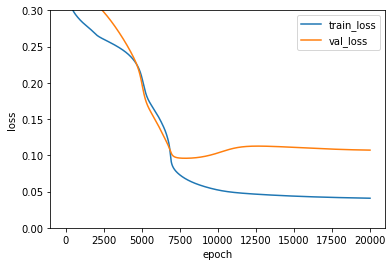

In [66]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

손실 그래프가 이전보다 천천히 감소하고 있습니다. 이는 SingleLayer 클래스보다 가중치 개수가 훨씬 많아져 학습하는 데 시간이 오래 걸리기 때문입니다.

SingleLayer 클래스 사용했을 때는 가중치 30개와 절편 1개가 필요했습니다.<br> DualLayer 클래스에서는 은닉층의 뉴런이 10개였으므로 30x10 개의 가중치와 10개의 절편이 필요하고 출력층 역시 10개의 가중치와 1개의 절편이 필요합니다. 즉, 총 321개의 가중치를 학습해야 합니다.

#### 가중치 초기화 계산하기

손실 그래프에서 초기 손실값이 감소하는 곡선이 매끄럽지 않습니다. 이는 손실함수가 감소하는 방향을 올바르게 찾는데 시간이 꽤 걸린 것으로 보입니다.<br> 이런 현상의 원인은 가중치 초기화와 관련되어 있습니다.지금까지는 가중치를 1로 놓고 훈련을 진행했습니다. 이번에는 np.random.normal()함수를 사용하여 정규 분포를 따르는 무작위 수로 가중치를 초기화 하겠습니다.

##### 1.가중치 초기화를 위한 init_weight() 메서드 수정하기

DualLayer 클래스를 상속한 RandomInitNetwork 클래스를 만들고 가중치를 초기화 하는 init_weights() 메서드만 수정하면 구현 가능합니다.

실행 결과를 동일하게 하기위해 np.random.seed()함수를 사용하여 무작위 수의 초깃값을 고정시켰습니다. 이를 사용하지 않는다면 무작위 수의 초깃값이 변경되어 다른 결과값이 나오게 됩니다.<br> normal 함수의 매개변수는 순서대로 평균, 표준편차, 배열 크기 입니다.

In [0]:
class RandomInitNetwork(DualLayer):
    
    def init_weights(self, n_features):
        np.random.seed(42)
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

##### 2.코드를 수정했다면 RandomInitNetwork 클래스 객체를 다시 만들고 모델을 훈련시킨 뒤 손실함수를 그립니다.

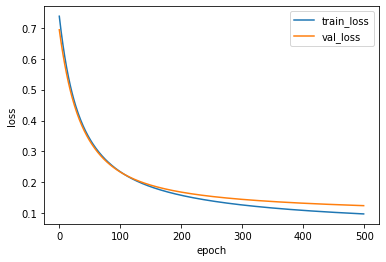

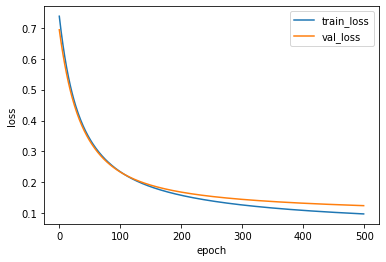

In [57]:
random_init_net = RandomInitNetwork(l2=0.01)
random_init_net.fit(x_train_scaled, y_train,
                    x_val=x_val_scaled, y_val=y_val, epochs=500)

plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

## **06-3. 미니 배치를 사용하여 모델을 훈련합니다** ##
 * * * 

딥러닝에서 아주 많은 양의 데이터를 사용하는데 이 경우 배치 경사 하강법은 사용하기 어렵습니다 **(이유는?)**
<br>따라서 확률적 경사 하강법과 배치 경사 하강법의 장점을 절충한 미니 배치(mini-batch) 경사 하강법을 씁니다.

앞에서 구현한 RandomInitNetwork 클래스를 사용해 미니 배치 경사 하강법을 구현하겠습니다.

#### 미니 배치 경사 하강법을 알아봅니다

미니 배치 경사 하강법은 에포크마다 전체 데이터를 사용하는 것이 아니라 일부 나누어서 정방향 계산을 수행하고 그레디언트를 구하여 가중치를 업데이트 합니다. 작게 나눈 미니 배치(보통 16,32,64등 2의 배수의 크기)를 사용합니다.

여기서 미니 배치의 크기가 1이면 확률적 경사 하강법이 됩니다. <br>예를 들어 미니 배치의 크기가 작으면 확률적 경사 하강법 처럼 손실 함수의 전역 최솟값을 찾는 과정이 크게 흔들리고, 미니 배치 크기가 크면 배치 경사 하강법 처럼 안정적으로 찾아갈 것입니다. 중요한 점은 미니 배치의 최적값은 정해진 것이 아니라 하이퍼파라미터 입니다.


#### 미니 배치 경사 하강법을 구현합니다

미니 배치 경사 하강법을 위한 클래스를 구현하겠습니다. 역시 위스콘신 유방암 데이터를 사용합니다.

##### 1. MinibatchNetwork 클래스 구현하기

앞에서 만든 RandomInitNetwork 클래스를 상속하여 미니 배치 경사 하강법을 구현합니다.<br> 새로 만들  MinibatchNetwork클래스는 배치 크기를 입력받아야 하므로 $__init__()$메서드에 batch_size 매개변수를 추가합니다.

In [0]:
class MinibatchNetwork(RandomInitNetwork):
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        super().__init__(units, learning_rate, l1, l2)
        self.batch_size = batch_size     # 배치 크기

MinibatchNetwork 클래스는 새로 추가된 batch_size 매개변수만 관리하고 나머지 매개변수들은  RandomInitNetwork 의 $__init__()$메서드로 전달합니다.

#### 2. fit() 메서드 수정하기

fit() 메서드는 비슷하기만 에폭을 순회하는 for문 안에 미니 배치를 순회하는 for문이 추가됩니다.

In [0]:
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y_val = y_val.reshape(-1, 1)     # 타깃을 열 벡터로 바꿉니다.
        self.init_weights(x.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        np.random.seed(42)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                y_batch = y_batch.reshape(-1, 1) # 타깃을 열 벡터로 바꿉니다.
                m = len(x_batch)                 # 샘플 개수를 저장합니다.
                a = self.training(x_batch, y_batch, m)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)


gen_batch() 메서드 역할로는
<br>1. 전체 훈련 데이터 x,y를 전달받아 batch_size 만큼 미니 배치를 만들어 반환
<br>2. 반환된 미니 배치 데이터 x_batch, y_batch를 training()메서드에 전달

앞에서 DualLayer의 fit()메서드와 다른 점은 샘플 개수 m을 미니 배치마다 계산한다는 것입니다 또한 두 번째 for문에서손실을 누적하기 위해 에폭마다 loss 변수를 초기화합니다.

##### 3.gen_batch()메서드 만들기

gen_batch()메서드는 파이썬 제너레이터로 구현합니다. 이는 순차적으로 데이터에 접근 및 반복가능한 객체를 반환합니다.<br> 장점은 리스트 없이 필요한 만큼 데이터를 추출 가능합니다. 방법은 일반적 함수 앞에 yield문을 사용하면 됩니다.

In [0]:
# 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.(미니 배치 순서 중복 방지)
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다

gen_batch()메서드는 batch_size만큼씩 x,y 배열을 건너뛰며 미니 배치를 반환합니다. <br> 확률적 경사 하강법때와 마찬가지로 gen_batch()메서드가 호출될 때마다(즉, 에폭마다) 훈련 데이터 배열의 인덱스를 섞습니다.. 이는 미니 배치가 똑같은 순서로 반복되지 않게 해주는 역할을 합니다.

##### 4. 미니 배치 경사 하강법 적용하기

이제 cancer 데이터 세트에 미니 배치 경사 하강법을 적용하겠습니다. 먼저 batch_size를 기본값 32로 하여 훈련합니다. 그런 다음 128로 늘려서 훈련하고 두 값을 비교해보겠습니다.

다음은 미니 배치값을 32로 한 것입니다.

In [61]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=32)
minibatch_net.fit(x_train_scaled, y_train, 
                  x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)

0.978021978021978

0.978021978021978

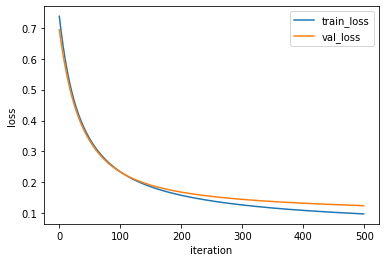

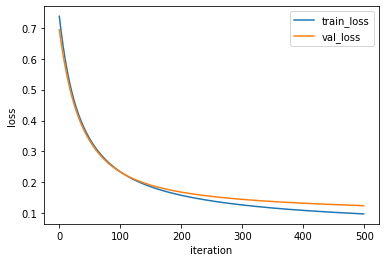

In [62]:
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

(06-2절의 마지막 그래프와 비교)

##### 5. 이제 미니 배치 크기를 128로 늘리겠습니다.

In [63]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=128)
minibatch_net.fit(x_train_scaled, y_train, 
                  x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)

0.978021978021978

0.978021978021978

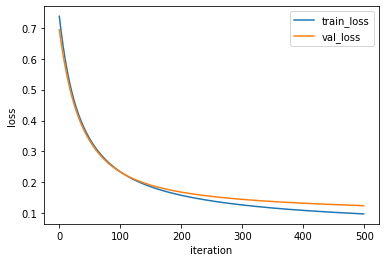

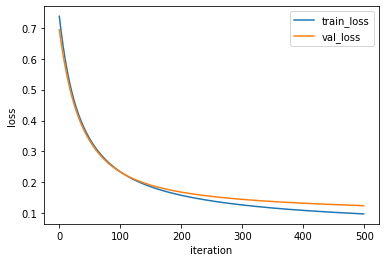

In [64]:
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

미니 배치 크기를 128로 늘렸더니 차이값이 줄어들어 손실 그래프가 조금 안정적으로 바뀌었지만 손실값이 줄어드는 속도는 느려졌습니다. 일반적으로 미니배치 크기는 32~512개 사이 값으로 지정합니다.

#### 사이킷런 사용하여 다층 신경망 훈련하기

사이킷을 사용하여 앞에서 만든 다층 완전 연결 신경망을 훈련하겠습니다.
<br> sklearn.neural_network 모듈 하에서 분류를 위한 MLPClassifier, 회귀 작업을 위한 MLPRegressor를 제공합니다.
<br>cancer 데이터 세트에 MLPClassifier클래스를 적용하고 결과 비교하겠습니다.

##### 1. MLPClassifier의 객체 만들기

역시 다른 것과 마찬가지로 클래스 객체 생성 후 fit()메서드로 훈련하고 score()메서드로 정확도를 평가합니다. predict()메서드로 새로운 샘플에 대한 분류 결과를 예측도 합니다.

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, ), activation='logistic',
                    solver='sgd', alpha=0.01, batch_size=32,
                    learning_rate_init=0.1, max_iter=1000)

다음은 MLPClassifier의 주요 매개변수를 정리했습니다

##### hidden_layer_sizes : 은닉층 크기 정의

은닉층 수와 뉴런의 개수를 튜플로 전달합니다.예를 들어 10개의 뉴런을 가진 2개의 은닉층을 만들려면 hidden_layer_sizes=(10,10)과 같이 설정합니다.
<br>매개변수의 기본값은 (100,) 입니다. 위 예제는 하나의 은닉층에 10개의 뉴런이 있으므로 (10,)으로 표시했습니다.

##### activation : 활성화 함수 지정

위 예시에서는 시그모이드 함수를 지정하기 위해 activation 매개변수에 logistic을 전달했습니다.(로지스틱 회귀에서 보통 활성화 함수로 시그모이드 썼던 개념입니다)
<br>기본 매개변수 값은 ReLU함수 입니다.

##### solver : 경사 하강법 알고리즘 종류 지정

기본값은 확률적 경사 하강법을 의미하는 sgd 입니다.

##### alpha : 규제를 적용하기 위한 매개변수

일반적으로 L1규제는 효과가 크지 않아서 사이킷런의 신경망 모델은 L2 규제만 지원합니다. 여기에서는 앞에서 만든 MinibatchNetwork클래스와 동일하게 0.01을 지정했습니다.

##### batch_size, learning_rate_init, max_iter : 배치 크기, 학습률 초깃값, 에폭 횟수

batch_size에서 배치 크기 크기를 32로 지정했습니다. 이 매개변수 기본값은 200입니다. 마짐가으로 학습률 초기값 매개변수는 0.1로 지정하고 max_iter를 1000으로 설정합니다.

In [69]:
mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

0.989010989010989

앞에서 직접 만든 모델보다 조금 향상된 성능을 얻었습니다.